In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
train = pd.read_table("train.dat",header = None)
train[['year', 'indicator']] = train[0].str.split(" ", expand = True)
train = train[["year","indicator"]].astype(float)
train["year"] = train["year"].astype(int)

In [3]:
test = pd.read_table("test.dat",header = None)
test.rename(columns={0:"year",1:"indicator"},inplace = True)
test.columns

Index(['year', 'indicator'], dtype='object')

In [4]:
test.dtypes

year           int64
indicator    float64
dtype: object

In [5]:
from sklearn.linear_model import LinearRegression
model = Ridge()

In [6]:
model.fit(np.array(train.year).reshape(-1,1),train.indicator)

Ridge()

In [7]:
r_sq = model.score(np.array(train.year).reshape(-1,1),train.indicator)

In [8]:
r_sq

0.22951628217699582

In [9]:
model.predict(np.array(test.year).reshape(-1,1))

array([66.49274366, 65.33884114, 66.26940769, 65.71106776, 65.52495445,
       65.26439581, 66.38107567, 64.85494653, 66.30663035, 66.23218503])

In [185]:
x = np.array(train.year.astype(float))

In [189]:
y =  np.array(train.indicator)

In [190]:
y

array([65.88791334, 67.21901249, 64.3206674 , 66.92166376, 66.11401206,
       66.59359495, 67.29843266, 65.96910343, 65.4752471 , 66.2797506 ,
       65.62325127, 65.58762306, 66.23720265, 65.26999151, 64.84324978,
       63.34073035, 66.40316557, 66.04316515, 63.87068233, 66.73921392,
       67.11898948, 65.37437138, 66.22703075, 65.36499928, 65.71061236,
       65.35474362, 66.00611589, 66.368468  , 66.78334217, 65.08089532,
       66.20761473, 62.29623387, 67.26293826, 61.93885757, 64.92412865,
       66.31769921, 66.45910062, 66.34765   , 65.65052   , 65.53492   ,
       66.11388   , 65.08628   ])

In [203]:
s = StandardScaler()
x_new = s.fit_transform(x.reshape(-1,1))

In [211]:
train["scaled"] = x_new

In [213]:
train["scaled"]

0     0.212311
1     0.877765
2    -1.318232
3     0.611584
4    -0.985506
5     0.478493
6     0.811220
7    -1.052051
8    -0.186961
9    -0.852415
10    1.476674
11   -0.253506
12   -0.918960
13   -1.185142
14   -1.251687
15   -1.451323
16    0.411948
17    0.278857
18   -1.384778
19    0.545038
20    0.678129
21   -0.120415
22   -0.453142
23   -0.053870
24    0.145766
25    1.543219
26   -0.386597
27   -0.519688
28    1.143947
29    1.609765
30    0.345402
31   -1.584414
32    0.744675
33   -1.650959
34    1.742855
35    1.277038
36   -0.586233
37   -0.719324
38   -1.118596
39    0.079221
40    1.343583
41    1.676310
Name: scaled, dtype: float64

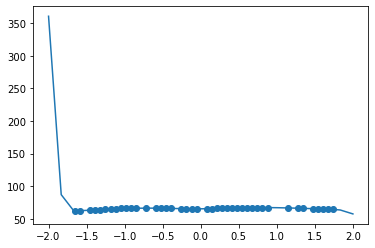

In [226]:
mymodel = np.poly1d(np.polyfit(np.array(train["scaled"]), y, 17))

myline = np.linspace(-2, 2, 25)

plt.scatter(np.array(train["scaled"]), y)
plt.plot(myline, mymodel(myline))
plt.show()

In [217]:
train["scaled"]

0     0.212311
1     0.877765
2    -1.318232
3     0.611584
4    -0.985506
5     0.478493
6     0.811220
7    -1.052051
8    -0.186961
9    -0.852415
10    1.476674
11   -0.253506
12   -0.918960
13   -1.185142
14   -1.251687
15   -1.451323
16    0.411948
17    0.278857
18   -1.384778
19    0.545038
20    0.678129
21   -0.120415
22   -0.453142
23   -0.053870
24    0.145766
25    1.543219
26   -0.386597
27   -0.519688
28    1.143947
29    1.609765
30    0.345402
31   -1.584414
32    0.744675
33   -1.650959
34    1.742855
35    1.277038
36   -0.586233
37   -0.719324
38   -1.118596
39    0.079221
40    1.343583
41    1.676310
Name: scaled, dtype: float64